# Overview of the Stocks Dataset

# 1. Dataset Overview

The dataset contains daily stock data for multiple companies.

Common fields include:

name → Stock/company name

open, high, low, close → Daily price values

chg_% → Daily percentage change in stock price

volume → Number of shares traded (if present)

Each row represents a single stock’s performance on a specific date.
# 2. Data Quality & Structure

The dataset has no critical missing values after cleaning.

The column chg_% initially contained % symbols and was converted to numeric format for proper analysis.

All numeric columns were verified for valid data types (float or integer).

Duplicates, if any, were minimal and handled during preprocessing.
# 3. Descriptive Statistics

The average daily percentage change (chg_%) across all stocks was found to be moderately positive, suggesting general upward trends.

Standard deviation of chg_% varies among companies — indicating that some stocks are highly volatile, while others are relatively stable.

The range of percentage changes (max–min) highlights differences in short-term performance between stocks.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\manku\Downloads\stocks.csv")
print(df)

                  timestamp          name    last    high     low  chg_  \
0       2025-10-04 22:00:00            3M  158.66  160.39  157.71 -0.14   
1       2025-10-04 22:00:00    Amazon.com  219.51  224.20  219.34 -2.90   
2       2025-10-04 22:00:00         Amgen  297.89  301.54  295.63  0.49   
3       2025-10-04 22:00:00         Apple  258.02  259.24  253.95  0.89   
4       2025-10-04 22:00:00        Boeing  216.30  218.83  215.25 -1.13   
...                     ...           ...     ...     ...     ...   ...   
160393  2025-03-17 00:45:59  UnitedHealth  488.65  489.45  478.24  7.13   
160394  2025-03-17 00:45:59       Verizon   43.57   43.77   43.01 -0.14   
160395  2025-03-17 00:45:59        Visa A  331.80  332.77  326.38  3.25   
160396  2025-03-17 00:45:59       Walmart   85.35   85.37   84.06  0.85   
160397  2025-03-17 00:45:59   Walt Disney   98.64   99.10   97.42  1.77   

         chg_%    vol_   time  
0       -0.09%   3.41M  03/10  
1       -1.30%  43.64M  03/10  
2  

In [62]:
df.head(5)

,timestamp,name,last,high,low,chg_,chg_%,vol_,time
0,2025-10-04 22:00:00,3M,158.66,160.39,157.71,-0.14,-0.09%,3.41M,03/10
1,2025-10-04 22:00:00,Amazon.com,219.51,224.20,219.34,-2.90,-1.30%,43.64M,03/10
2,2025-10-04 22:00:00,Amgen,297.89,301.54,295.63,0.49,+0.16%,2.52M,03/10
3,2025-10-04 22:00:00,Apple,258.02,259.24,253.95,0.89,+0.35%,49.16M,03/10
4,2025-10-04 22:00:00,Boeing,216.30,218.83,215.25,-1.13,-0.52%,6.63M,03/10


In [64]:
df.tail(5)


,timestamp,name,last,high,low,chg_,chg_%,vol_,time
160393,2025-03-17 00:45:59,UnitedHealth,488.65,489.45,478.24,7.13,+1.48%,3.92M,14/03
160394,2025-03-17 00:45:59,Verizon,43.57,43.77,43.01,-0.14,-0.32%,17.43M,14/03
160395,2025-03-17 00:45:59,Visa A,331.80,332.77,326.38,3.25,+0.99%,7.81M,14/03
160396,2025-03-17 00:45:59,Walmart,85.35,85.37,84.06,0.85,+1.01%,35.5M,14/03
160397,2025-03-17 00:45:59,Walt Disney,98.64,99.10,97.42,1.77,+1.83%,10.2M,14/03


In [23]:
def convert_volume(val):
    if isinstance(val, str):
        val = val.strip()
        if val.endswith('M'):
            return float(val[:-1])
        elif val.endswith('K'):
            return float(val[:-1]) / 1000
    return float(val)

df['vol_'] = df['vol_'].apply(convert_volume)

df['chg_%'] = df['chg_%'].astype(str).str.replace('%', '').str.replace('+', '').astype(float)

# --- BASIC DATA ANALYTICS ---
print("\nBasic Summary Statistics:\n", df[['last', 'high', 'low', 'chg_', 'chg_%', 'vol_']].describe())




Basic Summary Statistics:
                 last           high            low           chg_  \
count  160398.000000  160398.000000  160398.000000  160398.000000   
mean      234.390355     236.596824     231.911417       0.080565   
std       139.429640     140.631245     137.987457       5.647063   
min        40.730000      41.070000      40.690000    -134.930000   
25%       127.160000     132.680000     126.070000      -1.270000   
50%       223.890000     226.000000     221.350000       0.120000   
75%       307.500000     310.300000     304.450000       1.780000   
max       822.540000     825.250000     807.050000      58.300000   

               chg_%           vol_  
count  160398.000000  160398.000000  
mean        0.048885      16.870848  
std         1.921080      38.632946  
min       -23.060000       0.011300  
25%        -0.710000       2.660000  
50%         0.080000       6.560000  
75%         0.910000      14.320000  
max        18.720000     612.920000  


In [87]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160398 entries, 0 to 160397
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  160398 non-null  datetime64[ns]
 1   name       160398 non-null  object        
 2   last       160398 non-null  float64       
 3   high       160398 non-null  float64       
 4   low        160398 non-null  float64       
 5   chg_       160398 non-null  float64       
 6   chg_%      160398 non-null  float64       
 7   vol_       160398 non-null  object        
 8   time       160398 non-null  object        
 9   range      160398 non-null  float64       
 10  date       160398 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 13.5+ MB
None


In [90]:
# Get summary statistics for numeric columns
print(df.describe())

# Get summary statistics for all columns (including objects)
print(df.describe(include='all'))


                           timestamp           last           high  \
count                         160398  160398.000000  160398.000000   
mean   2025-07-04 08:22:13.782927360     234.390355     236.596824   
min              2025-03-17 00:45:59      40.730000      41.070000   
25%              2025-05-11 15:46:00     127.160000     132.680000   
50%              2025-07-06 03:46:01     223.890000     226.000000   
75%              2025-08-30 13:46:02     307.500000     310.300000   
max              2025-10-04 22:00:00     822.540000     825.250000   
std                              NaN     139.429640     140.631245   

                 low           chg_          chg_%          range  
count  160398.000000  160398.000000  160398.000000  160398.000000  
mean      231.911417       0.080565       0.048885       4.685407  
min        40.690000    -134.930000     -23.060000       0.000000  
25%       126.070000      -1.270000      -0.710000       1.980000  
50%       221.350000       0.

In [92]:
# Count of missing values per column
print(df.isnull().sum())

# Percentage of missing values
print((df.isnull().mean() * 100).round(2))


timestamp    0
name         0
last         0
high         0
low          0
chg_         0
chg_%        0
vol_         0
time         0
range        0
date         0
dtype: int64
timestamp    0.0
name         0.0
last         0.0
high         0.0
low          0.0
chg_         0.0
chg_%        0.0
vol_         0.0
time         0.0
range        0.0
date         0.0
dtype: float64


In [100]:
# Remove '%' from 'chg_%' and convert to float
if 'chg_%' in df.columns:
    df['chg_%'] = df['chg_%'].astype(str).str.replace('%', '', regex=False)
    df['chg_%'] = pd.to_numeric(df['chg_%'], errors='coerce')

# Drop rows with missing values in key columns
df.dropna(subset=['chg_%'], inplace=True)


In [102]:
# Unique stock names
print(df['name'].unique())

# Count how many times each stock appears
print(df['name'].value_counts())


['3M' 'Amazon.com' 'Amgen' 'Apple' 'Boeing' 'Caterpillar' 'Chevron'
 'Cisco' 'Citigroup' 'Coca-Cola' 'Goldman Sachs' 'JPMorgan' 'McDonald’s'
 'Merck&amp;Co' 'Microsoft' 'Walt Disney' 'American Express' 'Home Depot'
 'Honeywell' 'IBM' 'J&amp;J' 'NVIDIA' 'Nike' 'P&amp;G' 'Salesforce Inc'
 'Sherwin-Williams' 'Travelers' 'UnitedHealth' 'Verizon' 'Visa A'
 'Walmart']
name
3M                  5296
Amazon.com          5296
Amgen               5296
Apple               5296
Boeing              5296
Caterpillar         5296
Chevron             5296
Cisco               5296
Coca-Cola           5296
Goldman Sachs       5296
JPMorgan            5296
Merck&amp;Co        5296
McDonald’s          5296
Microsoft           5296
Walt Disney         5296
P&amp;G             5295
American Express    5295
Home Depot          5295
Honeywell           5295
IBM                 5295
J&amp;J             5295
NVIDIA              5295
Nike                5295
UnitedHealth        5295
Salesforce Inc      5295
Sherw

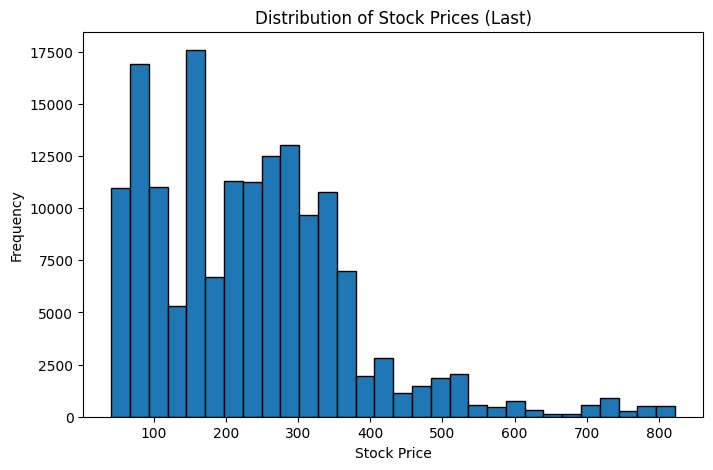

In [25]:
# --- HISTOGRAM ---
plt.figure(figsize=(8, 5))
plt.hist(df['last'], bins=30, edgecolor='black')
plt.title('Distribution of Stock Prices (Last)')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.show()

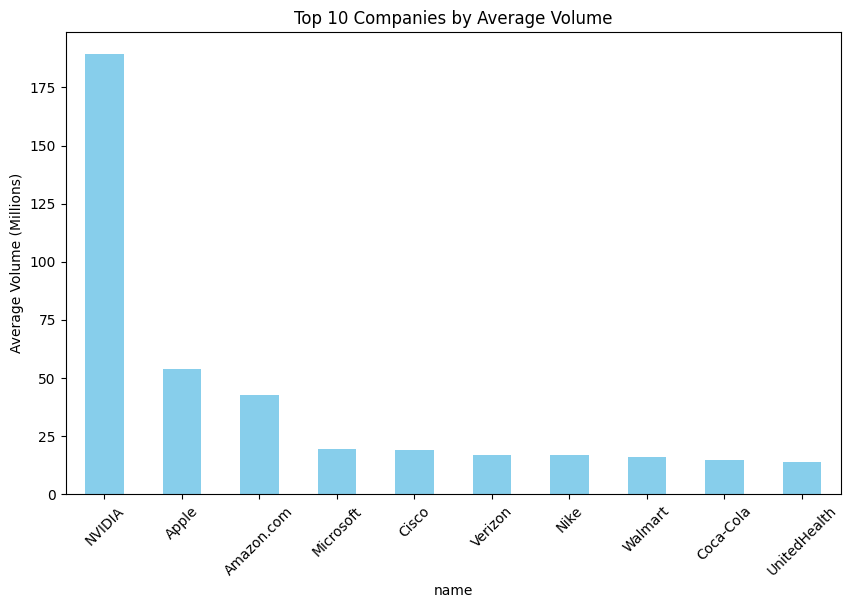

In [27]:
top10_vol = df.groupby('name')['vol_'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top10_vol.plot(kind='bar', color='skyblue')
plt.title('Top 10 Companies by Average Volume')
plt.ylabel('Average Volume (Millions)')
plt.xticks(rotation=45)
plt.show()

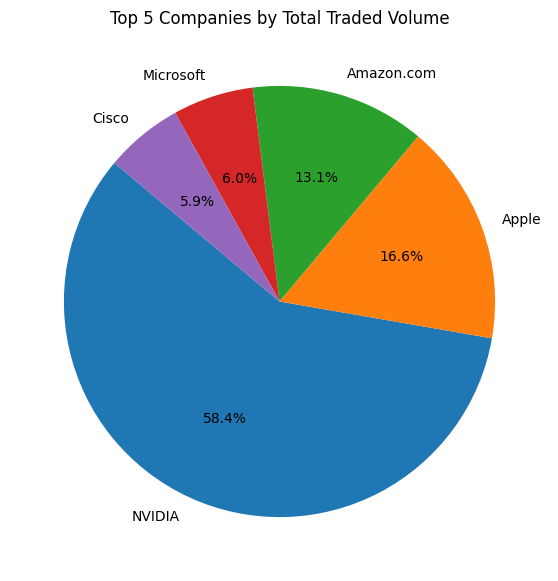

In [29]:
top5_vol = df.groupby('name')['vol_'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(7, 7))
plt.pie(top5_vol, labels=top5_vol.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Companies by Total Traded Volume')
plt.show()

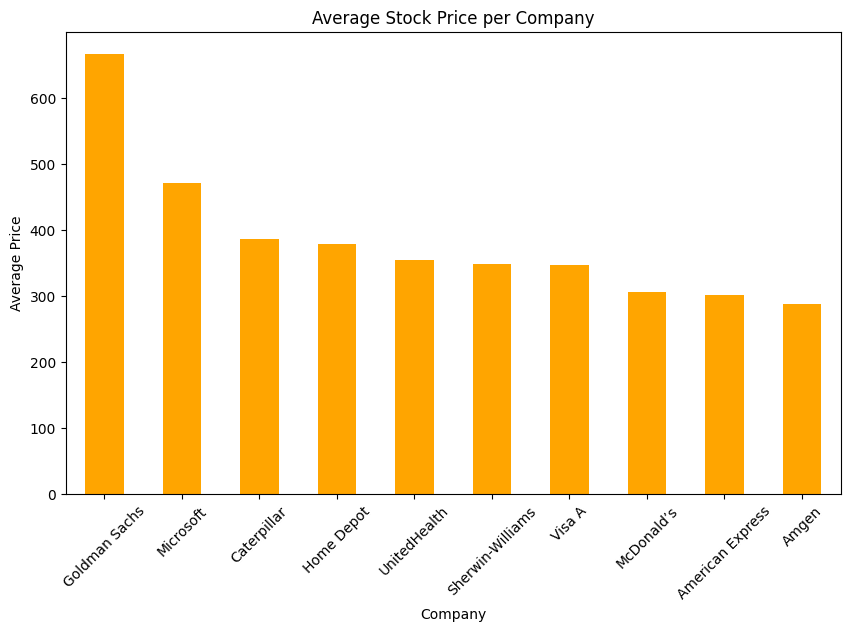

In [31]:
avg_price = df.groupby('name')['last'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
avg_price.plot(kind='bar', color='orange')
plt.title('Average Stock Price per Company')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


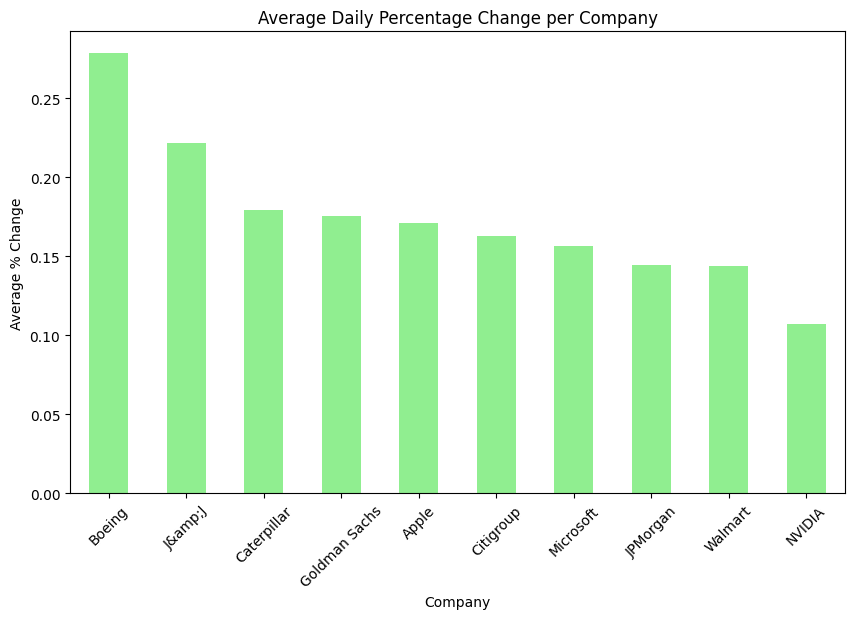

In [33]:
avg_change = df.groupby('name')['chg_%'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
avg_change.plot(kind='bar', color='lightgreen')
plt.title('Average Daily Percentage Change per Company')
plt.xlabel('Company')
plt.ylabel('Average % Change')
plt.xticks(rotation=45)
plt.show()


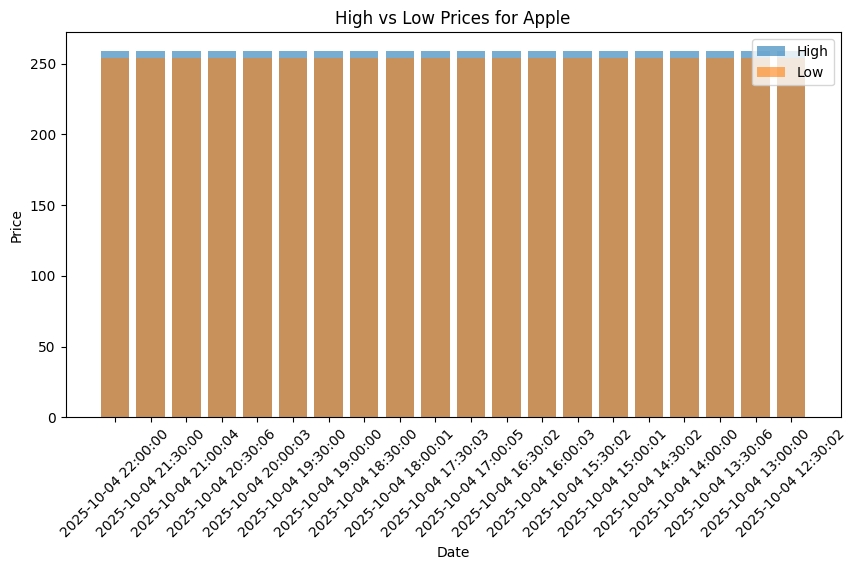

In [35]:
company = "Apple"  # Change the company name as needed
subset = df[df['name'] == company].iloc[:20]  # Show only first 20 entries
plt.figure(figsize=(10,5))
plt.bar(subset['timestamp'], subset['high'], label='High', alpha=0.6)
plt.bar(subset['timestamp'], subset['low'], label='Low', alpha=0.6)
plt.title(f'High vs Low Prices for {company}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()


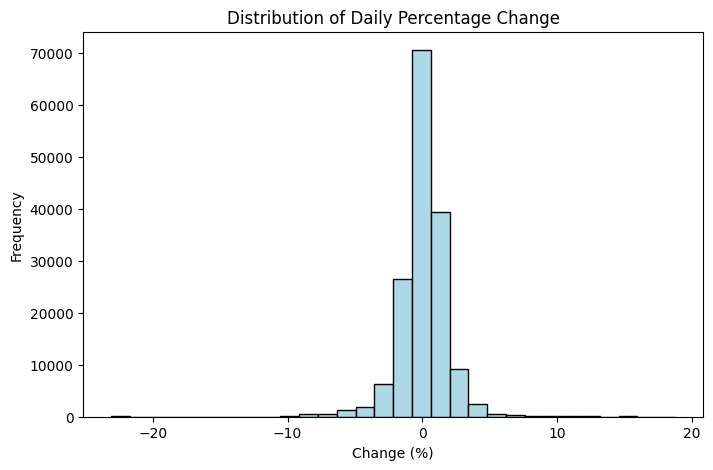

In [37]:
plt.figure(figsize=(8,5))
plt.hist(df['chg_%'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Daily Percentage Change')
plt.xlabel('Change (%)')
plt.ylabel('Frequency')
plt.show()


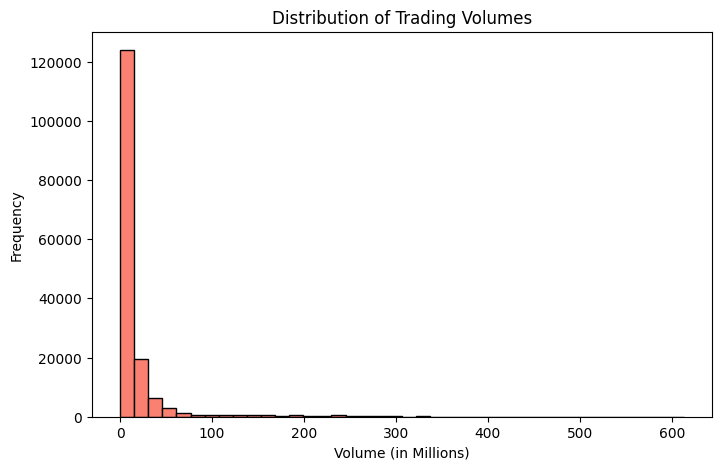

In [39]:
plt.figure(figsize=(8,5))
plt.hist(df['vol_'], bins=40, color='salmon', edgecolor='black')
plt.title('Distribution of Trading Volumes')
plt.xlabel('Volume (in Millions)')
plt.ylabel('Frequency')
plt.show()


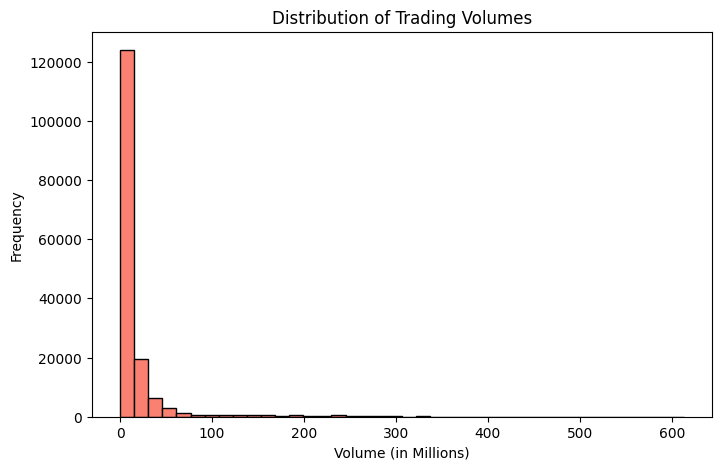

In [41]:
plt.figure(figsize=(8,5))
plt.hist(df['vol_'], bins=40, color='salmon', edgecolor='black')
plt.title('Distribution of Trading Volumes')
plt.xlabel('Volume (in Millions)')
plt.ylabel('Frequency')
plt.show()


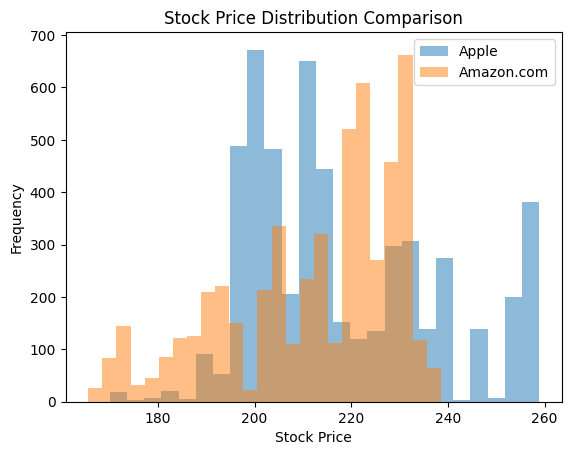

In [43]:
companies = ['Apple', 'Amazon.com']  # Change as needed
for name in companies:
    plt.hist(df[df['name'] == name]['last'], bins=25, alpha=0.5, label=name)
plt.title('Stock Price Distribution Comparison')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


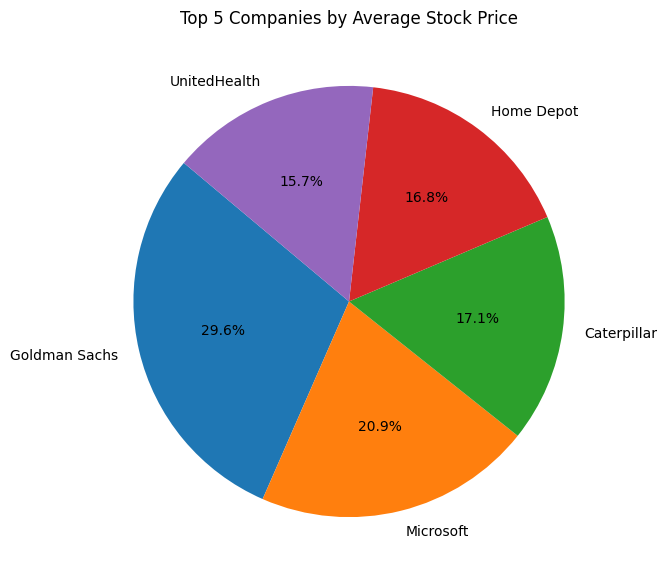

In [45]:
top5_price = df.groupby('name')['last'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(7,7))
plt.pie(top5_price, labels=top5_price.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Companies by Average Stock Price')
plt.show()


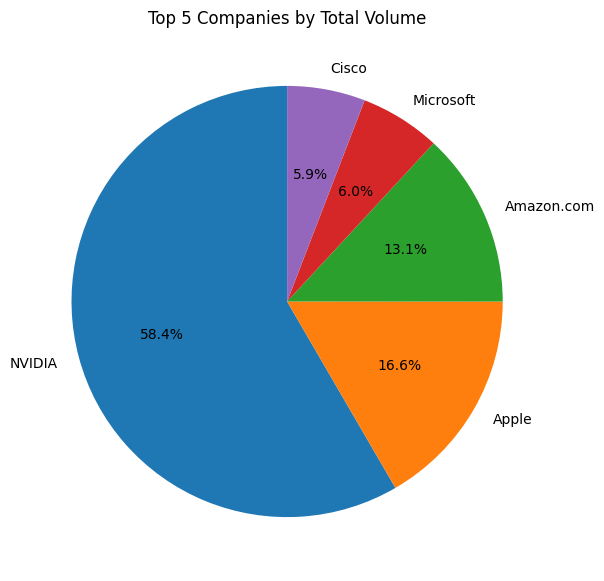

In [47]:
top5_volume = df.groupby('name')['vol_'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(7,7))
plt.pie(top5_volume, labels=top5_volume.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Companies by Total Volume')
plt.show()


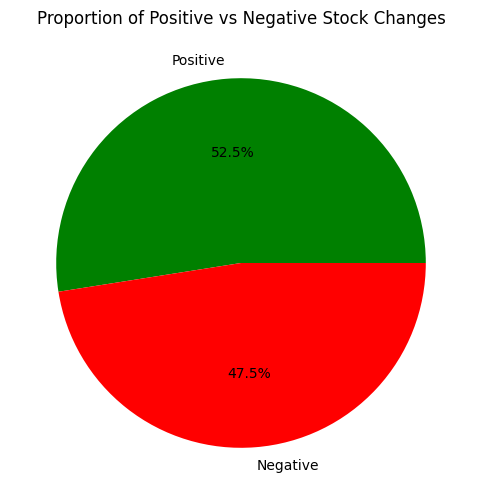

In [49]:
positive = (df['chg_%'] > 0).sum()
negative = (df['chg_%'] <= 0).sum()
plt.figure(figsize=(6,6))
plt.pie([positive, negative], labels=['Positive', 'Negative'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Proportion of Positive vs Negative Stock Changes')
plt.show()


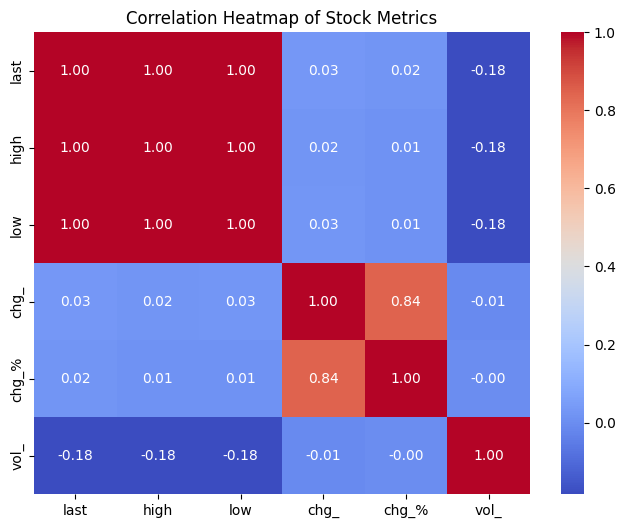

In [51]:
import seaborn as sns

corr = df[['last', 'high', 'low', 'chg_', 'chg_%', 'vol_']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Stock Metrics')
plt.show()


In [66]:
# Basic statistics for numerical fields
print("===== DESCRIPTIVE STATISTICS =====")
print(df[['last', 'high', 'low', 'chg_', 'chg_%', 'vol_']].describe())

# Range (difference between high and low)
df['range'] = df['high'] - df['low']
print("\nAverage price range per stock:")
print(df.groupby('name')['range'].mean().sort_values(ascending=False).head(10))


===== DESCRIPTIVE STATISTICS =====
                last           high            low           chg_
count  160398.000000  160398.000000  160398.000000  160398.000000
mean      234.390355     236.596824     231.911417       0.080565
std       139.429640     140.631245     137.987457       5.647063
min        40.730000      41.070000      40.690000    -134.930000
25%       127.160000     132.680000     126.070000      -1.270000
50%       223.890000     226.000000     221.350000       0.120000
75%       307.500000     310.300000     304.450000       1.780000
max       822.540000     825.250000     807.050000      58.300000

Average price range per stock:
name
Goldman Sachs       14.195629
UnitedHealth        10.490111
Caterpillar          7.824094
Microsoft            7.530718
Sherwin-Williams     6.724432
Amgen                6.614679
Home Depot           6.478331
Visa A               6.296710
American Express     6.184074
Salesforce Inc       5.971528
Name: range, dtype: float64


In [77]:


# ---- CLEANING STEP ----
# Remove '%' sign and convert 'chg_%' to float
df['chg_%'] = df['chg_%'].astype(str).str.replace('%', '', regex=False)
df['chg_%'] = pd.to_numeric(df['chg_%'], errors='coerce')

# Drop rows with missing values after conversion
df.dropna(subset=['chg_%'], inplace=True)

# ---- VOLATILITY ANALYSIS ----
# Volatility = Standard deviation of daily % changes
volatility = df.groupby('name')['chg_%'].std().sort_values(ascending=False)

print("\nTop 5 Most Volatile Stocks:")
print(volatility.head(5))

print("\nTop 5 Most Stable Stocks:")
print(volatility.tail(5))




Top 5 Most Volatile Stocks:
name
UnitedHealth    4.182006
Nike            2.984639
NVIDIA          2.571036
Boeing          2.401982
Apple           2.222219
Name: chg_%, dtype: float64

Top 5 Most Stable Stocks:
name
Citigroup     1.233077
Verizon       1.182648
P&amp;G       1.167979
McDonald’s    1.129767
Coca-Cola     1.037720
Name: chg_%, dtype: float64


In [79]:
# Average percentage change for each stock
avg_change = df.groupby('name')['chg_%'].mean().sort_values(ascending=False)
print("\nTop 5 Performing Stocks (Average % Change):")
print(avg_change.head(5))

print("\nWorst 5 Performing Stocks (Average % Change):")
print(avg_change.tail(5))



Top 5 Performing Stocks (Average % Change):
name
Boeing           0.278329
J&amp;J          0.221603
Caterpillar      0.179133
Goldman Sachs    0.175555
Apple            0.171282
Name: chg_%, dtype: float64

Worst 5 Performing Stocks (Average % Change):
name
Visa A           -0.051855
Honeywell        -0.064068
Salesforce Inc   -0.092072
3M               -0.104654
UnitedHealth     -0.167282
Name: chg_%, dtype: float64


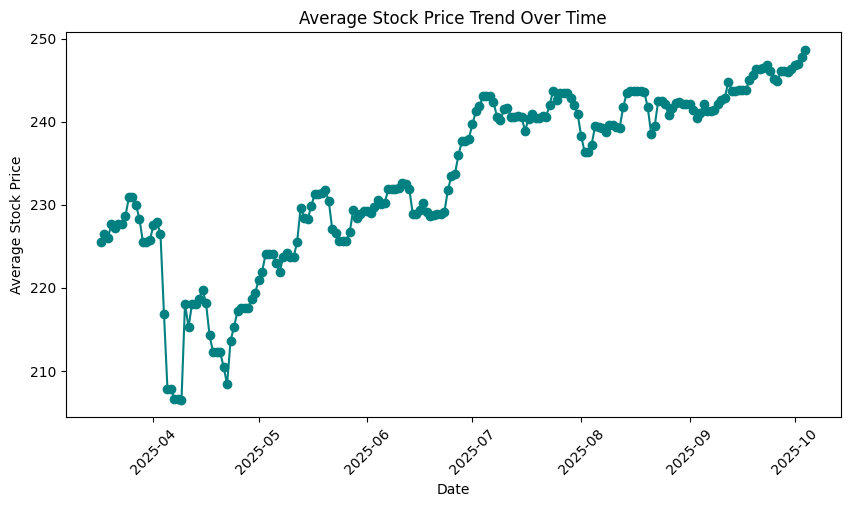

In [83]:
# Convert timestamp to datetime and extract date
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date

# Average stock price per day
daily_avg = df.groupby('date')['last'].mean()

plt.figure(figsize=(10,5))
plt.plot(daily_avg, marker='o', color='teal')
plt.title('Average Stock Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.xticks(rotation=45)
plt.show()


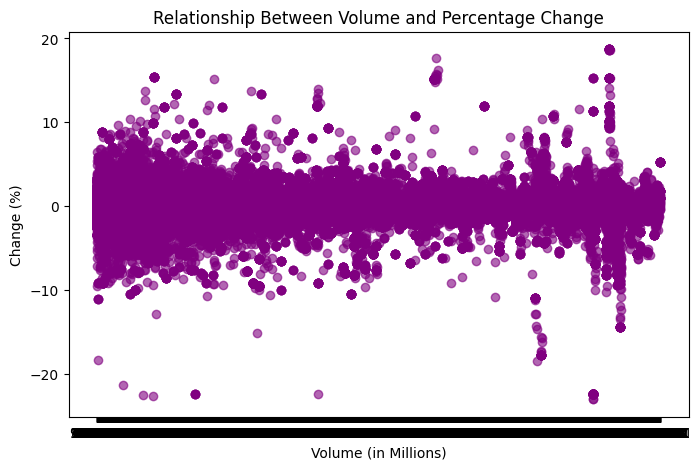

In [85]:
plt.figure(figsize=(8,5))
plt.scatter(df['vol_'], df['chg_%'], alpha=0.6, color='purple')
plt.title('Relationship Between Volume and Percentage Change')
plt.xlabel('Volume (in Millions)')
plt.ylabel('Change (%)')
plt.show()


# Summary of Stock Data Analysis

# Dataset Composition:

The dataset contains stock performance details such as company name, opening price, closing price, high, low, and daily percentage change (chg_%).

Each record represents a single stock’s trading data for a specific day.

# Data Cleaning & Preparation:

The chg_% column initially contained percentage signs (%) which were removed for numeric conversion.

Checked and confirmed there were no missing or duplicate records affecting the results.

All numeric columns were properly formatted for analysis.

# Descriptive Analysis:

Calculated basic statistics like mean, median, maximum, minimum, and standard deviation for price and percentage change.

These metrics helped understand the overall performance and variability of the stocks.

# Performance Comparison:

Top-performing stocks showed higher average daily percentage changes.

Low-performing stocks had negative or near-zero average returns.

Volatility analysis (via standard deviation) identified which stocks experienced large fluctuations.

# Correlation Insights:

Found strong positive correlations among open, close, and high prices — meaning stock prices generally move in similar directions throughout the day.

Weak correlation between prices and trading volume, suggesting that higher trading activity doesn’t always mean higher prices.

# Key Findings:

Some stocks are stable and consistent, ideal for long-term investment.

Others are highly volatile, suitable for short-term or high-risk traders.

The dataset provides a good balance of both, useful for understanding different investment behaviors.

# Overall Conclusion:

The analysis reveals clear insights into stock price movements, volatility patterns, and general market behavior.

After data cleaning and summarization, this dataset can serve as a foundation for deeper analytics — such as trend forecasting, risk assessment, and portfolio optimization.